# Alternate method for Exercise 7

In this document I will try to show how the use of functional methods can make data analysis approachable and understandable while increasing the possible performance in various ways. This neccessiataes a fundamental shift in how the analysis is designed in terms of program structure. This however does not sacrifice any functionality in terms of possible analyses methods in comparison with the widely used object oriented method of writing Analyses.

In [1]:
import sys
from include.RandomHelper import check_data_state
check_data_state(directory="./data")

Necessary directories present.


As first step the data should be read in. This is done with the pandas module, a third party data analysis framework for python. The data is read into a `dataframe` object that is defined by the pandas library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
pd.set_option('display.max_columns', None)

# Background simulation
bkgnd_sim_file_1 = "./data/for_long_analysis/mc_init/MC_2012_ZZ_to_4L_2el2mu.csv"
bkgnd_sim_file_2 = "./data/for_long_analysis/mc_init/MC_2012_ZZ_to_4L_4mu.csv"
bkgnd_sim_file_3 = "./data/for_long_analysis/mc_init/MC_2012_ZZ_to_4L_4el.csv"

# Signal simulation
sig_sim_file_1 = "./data/for_long_analysis/mc_init/MC_2012_H_to_ZZ_to_4L_2el2mu.csv"
sig_sim_file_2 = "./data/for_long_analysis/mc_init/MC_2012_H_to_ZZ_to_4L_4mu.csv"
sig_sim_file_3 = "./data/for_long_analysis/mc_init/MC_2012_H_to_ZZ_to_4L_4el.csv"

bkgnd_sim_2el2mu = pd.read_csv(bkgnd_sim_file_1, delimiter=";")
bkgnd_sim_4mu = pd.read_csv(bkgnd_sim_file_2, delimiter=";")
bkgnd_sim_4el = pd.read_csv(bkgnd_sim_file_3, delimiter=";")

## Discussion of the data
The data described here is data generated by mote-carlo event generators and is split into background and signal simulation. To optimize our analysis we will use the monte-carlo data to make sure that the analysis is not artificially tuned to find a peak in the real data but only find a peak that we put there (in the simulation). If the peak is not there in the data we can be sure that our analysis would have picked it up and therefore can say if there was a peak at the predicted location or not without having to worry about if the analysis was skewed to find the peak because you thought there ought to be one and then made the analysis to produce data to fit your conclusion.

The pandas dataframes that we loaded currently only describe the background (the background that we expect according to the predictions of the standard model). More precicely they describe the background that is expected in the 2e2mu channel. the other dataframe de

First let's examine the data in the dataframe

In [3]:
bkgnd_sim_2el2mu.head(5)

,run,event,luminosity_section,muon_energy,muon_px,muon_py,muon_pz,muon_charge,muon_relPFIso,muon_dxy,muon_dz,muon_SIP3d,electron_energy,electron_px,electron_py,electron_pz,electron_charge,electron_relPFIso,electron_dxy,electron_dz,electron_SIP3d
0,194533.0,846714,2823,"55.3949,35.6495","-48.399,31.2184","24.7739,-15.0449","-10.6009,8.36253","-1,1","0.0209805,0.0524248","-0.00105939,-0.00198611","0.00580479,-0.000121758","1.6412,0.661312","254.196,36.8009","18.0862,-12.0845","-48.5142,24.8936","-248.867,-24.2607","-1,1","0.0250167,0.0712457","-0.0028464,0.000602746","-0.00391345,0.00170042","0.47657,0.431616"
1,194533.0,846715,2823,"46.227,17.1694","-2.8323,11.2507","-13.9613,-1.2918","-43.9771,-12.9046","-1,1","0.191416,0.17468","0.00761235,-0.000309401","-0.00194986,0.00129964","0.946415,0.308535","82.9044,11.4583","1.71208,-8.54741","28.2926,2.83502","-77.9085,7.08491","-1,1","0.15352,0.515702","-0.00206888,0.00300649","-0.00538221,7.12868e-05","0.937364,0.413622"
2,194533.0,846723,2823,"19.461,10.3101","11.2609,9.16698","-10.3577,-2.32848","-12.0261,4.10262","-1,1","0.155083,0.221734","0.000703356,0.00115165","0.000846168,-0.00065684","0.296126,0.240591","42.9922,71.6306","-16.5883,5.92063","38.9813,-30.8763","-7.32215,-64.3627","-1,1","0.103053,0.0723279","-0.000581222,-0.023985","0.00161887,0.0172354","0.369838,4.44646"
3,194533.0,846753,2823,"8.09622,7.72517","0.0821112,-2.40281","6.51906,-6.02051","4.79925,4.20085","-1,1","0.216925,0.41674","0.000483781,-0.00335737","-0.00433865,-0.00260739","0.973179,0.868803","39.5647,98.4103","35.2052,-31.9606","18.029,-9.41048","0.956613,92.5988","1,-1","0.1432,0.049916","0.00165894,-0.000320531","0.0132108,0.00052476","1.92044,0.0866598"
4,194533.0,846763,2823,"71.6791,80.8522","64.102,25.6134","-26.1167,41.6729","18.6209,64.3769","1,-1","0.014919,0.013307","-0.000143862,-0.000591512","-0.00487695,0.00341611","1.44616,0.757034","81.314,11.1153","-78.6539,-10.3513","-11.2899,-3.73267","17.2646,-1.57127","1,-1","0.0136104,0.250511","-0.000410155,-0.00214753","0.00174084,-0.00185153","0.465797,0.454134"


In [4]:
bkgnd_sim_4mu.head(5)

,run,event,luminosity_section,muon_energy,muon_px,muon_py,muon_pz,muon_charge,muon_relPFIso,muon_dxy,muon_dz,muon_SIP3d
0,194533.0,1142211,3809,"52.8881,104.397,29.9594,60.5544","-49.2137,16.0997,24.2971,14.3324","0.527564,-27.1821,11.0576,-1.76615","-19.3616,99.5022,-13.599,58.8072","1,-1,-1,1","0.0296542,0,0.0445055,0","-0.000377091,-0.000857253,0.00163948,-0.00102962","-0.000987451,0.00553847,0.000673754,-0.00563673","0.341185,1.17472,0.74423,0.727535"
1,194533.0,1142219,3809,"113.521,30.6528,11.4094,9.06379","37.3417,-30.5574,-3.5702,-7.26697","-15.5895,2.03743,8.37685,-2.60909","106.064,-1.29509,-6.87345,-4.74604","-1,1,1,-1","0.0125911,0.0117654,0.0899817,0.248405","0.000726053,-0.000136719,0.00150134,-0.00245663","-0.00287983,-0.000185169,0.00946114,0.00240733","0.441156,0.103343,1.74382,0.729126"
2,194533.0,1142220,3809,"37.5417,32.4731,12.4247,10.6322","-2.73565,7.73404,-6.42318,-4.64318","-32.3749,29.0231,10.0461,9.51578","-18.8082,12.3425,3.49,-0.961091","-1,1,-1,1","0.055162,0.188471,0.100481,0.0632636","0.000818172,0.00046863,0.00134882,-0.00210051","0.000417443,0.00251968,-0.00210166,0.00386756","0.284802,0.838615,0.697662,0.928048"
3,194533.0,1142228,3809,"264.068,79.0522,66.5292,86.7354","99.6408,-69.2727,-1.5023,-1.36519","-14.9597,13.4225,36.1747,-25.441","244.09,35.6422,55.8145,82.9091","1,1,-1,-1","0.0194944,0.023523,0.051396,0.0","-0.000898767,-0.000213138,-0.00100135,0.00651469","0.00257914,-0.00103711,-0.00125057,-0.0108969","0.617079,0.401096,0.416188,1.9014"
4,194533.0,1142229,3809,"56.8948,40.0339,28.6141,21.4495","27.7498,-24.7057,9.16045,-5.26999","-28.8856,18.0678,8.47077,6.4065","40.4052,25.8047,25.7505,19.7801","-1,1,-1,1","0,0.00768358,0.0969734,0","-0.000252906,-0.000368003,0.00109531,0.000284646","-0.00435722,0.00268917,-0.000446212,0.00316748","1.24902,0.757682,0.208022,0.445693"


In [5]:
type(bkgnd_sim_2el2mu['muon_energy'][0])

str

As you can see the some columns have been parsed as strings. We need to fix that and convert the strings to lists of floating point numbers. Depending on a few things there are (more or less) two approaches that can be used to perform this step and all further steps of the data processing.
1. The first method is using a functional programming style. This means that as a first step a set of functions are applied that act on one single event, taking in the entire event, somehow modifying it and then returning that modified event. These functions will then be used with pythons internal filter and map methods. This is a data-flow centric approach where, using map and filter, the functions are combined into a data pipeline and then the data is fed through the pipeline. It uses iterators as central objects for the creation of the pipeline that then feed the data through one element at a time. This document will focus on the this first approach.

2. The second method is an approach that is more like a spreadsheet. The original data is still kept and if a quantity needs to be calculated or some subset of the data needs to be altered for each and every event (such as the parsing of the string into an array of floats) then either a column is modified or a new column is added to the table. Further more the data in the table can be aggregated in various ways to "answer questions about the data" (that was using data science speak). This approach does not really think about "flows" of data but treats everything like a giant spreadsheet.

# The functional / data-flow approach
---
So for this part I will demonstrate the data-flow approach using python iterators and the filter/map functions from python's core

First of all we need to transform the data of the pandas dataframe into an iterator so that we can apply all further operations using map and filter (and a few other neat functions that are provided in the `itertools` module of the python standard library (these are a few functions that do neat things with iterators)

But you legitamely might be asking what an iterator actually is. And the technical answer to that question is:

>An iterator is something you can call next() on as in `next(something)`. By definition that something is an iterator

Let me note that `next()` is not an attribute call here but an [built in function](https://docs.python.org/3/library/functions.html) of python. This is part of what makes iterators somewhat special in python.

In less technical terms, an iterator is something that can produce a value of a certain structure (or type more precicely). That means if we have the iterator `something` and `next(something)` produces a `tuple(int, float, str)` then any subsequent calls should produce a `tuple(int, float, str)`. I say should here because there are exceptions to this but that will not be discussed here. If the iterator can't return anything anymore it raises the `StopIteration` exception, which essentially signals to the pipeline that no more data is coming.

Iterators are essentially abstractions of lists. And sure enough a list in python is an iterator (anthing that can be used in a `for` loop is an iterator because 'under the hood' the for loop goes through an iterator one by one and applies whatever is specified in the for loop to each item it gets from the iterator. The difference is that iterators don't neccesarily need to be lists, they just need to know how to produce the next item.

Let's look at a typical thing that python newcomers tend to write:

```python
data = [1, 2, 3, 4, 5, 6]
for i in range(len(data)):
    data[i] += 4
```
Now we could think that `range(len(data))` is a list but it is not, as discussed it is an iterator. because range knows when to stop and how to generate the next item from the current one (in this case it adds `1` to the current count) and returns it when `next()` is called on it.

A similar thing can be done for random numbers, instead of fillig an array with random numbers an iterator can be used because the function that generates the random numbers must allways know how to generate the next random number from some internal state. So we could generate the next number exactly and only when we need it. This eliminates the need to keep massive amounts of random numbers in the main memory and makes programs a lot more recource efficient (with some caveats I won't go into). Essentially the only thing we need to be able to do is somehow 'pause' the random number function right after generating a random number and hit the proverbial 'play' button as soon as we want the next number and hit 'pause' again right after the number was generated. This way of writing a function has already been done for many things in python so I won't go into it here [they are called 'generators' just fyi](https://docs.python.org/3/glossary.html#term-generator).

For more information you can also read [this document on functional programming in python](https://docs.python.org/3/howto/functional.html)

The thing this enables is to wrap iterators around each other and we will allways get back an interator. This is what the `map` and `filter` methods do.
Let's look at what happens when we have an example iterator (I'll use a simple list here as the iterator but it can easily be something different as long as it is an iterator) that returns a tuple of 3 numbers and that is wrapped with some map and filter methods.

In [6]:
def add_first_two_nums(elem):
    return (elem[0], elem[1], elem[2], elem[0]+elem[1])

def sum_over_10(elem):
    return True if elem[3] > 10 else False
   
def sub_3rd_from_1st(elem):
    return (elem[0], elem[1], elem[2], elem[3], elem[0]-elem[2])

def negative_difference(elem):
    return True if elem[4] < 0 else False

data = [(1,2,3), (4,5,6), (7,8,9), (3,2,1), (6,5,4), (9,8,7), (15, 0, 2)]
data1 = map(add_first_two_nums, data)
filtered_data1 = filter(sum_over_10, data1)
data2 = map(sub_3rd_from_1st, filtered_data1)
filtered_data2 = filter(negative_difference, data2)
filtered_data2

As you can see `filtered_data2` is not a list of tuples, which I would have expected if I had not known better. As I said before what we have built here is an iterator, not the data. we can however call `next()` on `filtered_data2`

In [7]:
next(filtered_data2)

(7, 8, 9, 15, -2)

which gives an item and as we can see it has 5 numbers as part of it. The fourth element is the sum of the first two elements (just as we have specified) and the last element is the difference between the first and third element. We can also see that the third element is larger than 10 and the fourth element is negative so the data also satisfies all our criteria that we defined in the filters. It is also not the first element of the sequence but the first element of the list that satisfies all criteria that we applied.

As this is a pipeline, the sequence of operations is important any element that does not satisfy the first requirement is dropped at the first filter so cant even reach the second filter so even if it would pass the requirements of the second filter it won't be shown (just as water in a stream that is used or diverted can't be used downstream of the point of diversion/use). This may be obvious but I wanted to point this out just in case.

calling `next()` again will subsequently result in either the next element that satisfies the all filteres or in a `StopIteration` exception.

In [8]:
next(filtered_data2)

StopIteration: 

As there is no further data that meets the requirements `next()` raises an exception of the aforementioned type.

It is also important to note that iterators are 'consumed' i.e. once the `StopIteration` exeption was raised by an iterator it can no longer be used. This also applies to all iterators that are passed to a subsequent iterator. So in our case `filtered_data1` will also raise a `StopIteration` exception even though we have not called `next()` explicitly on it (`next()` was implicitly called by the `data2` iterator on which `next()` was implicitly called by the `filtered_data2` iterator which we explicitly called `next()` on).

But just to be sure:

In [9]:
next(filtered_data1)

StopIteration: 

Just as expected, we get an `StopIteration` exception.

The [itertools](https://docs.python.org/3/library/itertools.html) module of the standard library has a few iterators that take on the role of various 'flow management' tasks like splitting an iterator into two iterators or repeating a variable a few times, accumulate things and other tasks. This module is really useful and is definitely better than building your own iterator for a problem. Remember all these iterators can be chained to make more complex iterators that can then be reused on different data.

So lets start with the actual task. First of as before, we need to parse all entries that are strings into numpy arrays. I say numpy arrays explicitly because I am planning to use the methods defined for numpy arrays. Before that however we need to transform the dataframe into an iterator over the rows (events) of the dataframe. Thankfully pandas already came with that.

In [10]:
# transform the dataframe into an iterator
data = bkgnd_sim_2el2mu.iterrows()

In [11]:
next(data)

(0,
 run                                    194533
 event                                  846714
 luminosity_section                       2823
 muon_energy                   55.3949,35.6495
 muon_px                       -48.399,31.2184
 muon_py                      24.7739,-15.0449
 muon_pz                      -10.6009,8.36253
 muon_charge                              -1,1
 muon_relPFIso             0.0209805,0.0524248
 muon_dxy              -0.00105939,-0.00198611
 muon_dz               0.00580479,-0.000121758
 muon_SIP3d                    1.6412,0.661312
 electron_energy               254.196,36.8009
 electron_px                  18.0862,-12.0845
 electron_py                  -48.5142,24.8936
 electron_pz                 -248.867,-24.2607
 electron_charge                          -1,1
 electron_relPFIso         0.0250167,0.0712457
 electron_dxy           -0.0028464,0.000602746
 electron_dz            -0.00391345,0.00170042
 electron_SIP3d               0.47657,0.431616
 Name: 0,

As we can see here from the first event the object returned from the iterator is a tuple where the first entry is an int (the index of the row) and the secon d element is a series containing the entries of that row. We now need to parse everything that is a string into a numpy array

In [12]:
# function that parses all strings into lists
def parse_strings(event):
    ed = event[1]
    ed['muon_energy'] = np.array([float(e) for e in ed['muon_energy'].split(',') if e != ''])
    ed['muon_px'] = np.array([float(e) for e in ed['muon_px'].split(',') if e != ''])
    ed['muon_py'] = np.array([float(e) for e in ed['muon_py'].split(',') if e != ''])
    ed['muon_pz'] = np.array([float(e) for e in ed['muon_pz'].split(',') if e != ''])
    ed['muon_charge'] = np.array([float(e) for e in ed['muon_charge'].split(',') if e != ''])
    ed['muon_relPFIso'] = np.array([float(e) for e in ed['muon_relPFIso'].split(',') if e != ''])
    ed['muon_dxy'] = np.array([float(e) for e in ed['muon_dxy'].split(',') if e != ''])
    ed['muon_dz'] = np.array([float(e) for e in ed['muon_dz'].split(',') if e != ''])
    ed['muon_SIP3d'] = np.array([float(e) for e in ed['muon_SIP3d'].split(',') if e != ''])
    ed['electron_energy'] = np.array([float(e) for e in ed['electron_energy'].split(',') if e != ''])
    ed['electron_px'] = np.array([float(e) for e in ed['electron_px'].split(',') if e != ''])
    ed['electron_py'] = np.array([float(e) for e in ed['electron_py'].split(',') if e != ''])
    ed['electron_pz'] = np.array([float(e) for e in ed['electron_pz'].split(',') if e != ''])
    ed['electron_charge'] = np.array([float(e) for e in ed['electron_charge'].split(',') if e != ''])
    ed['electron_relPFIso'] = np.array([float(e) for e in ed['electron_relPFIso'].split(',') if e != ''])
    ed['electron_dxy'] = np.array([float(e) for e in ed['electron_dxy'].split(',') if e != ''])
    ed['electron_dz'] = np.array([float(e) for e in ed['electron_dz'].split(',') if e != ''])
    ed['electron_SIP3d'] = np.array([float(e) for e in ed['electron_SIP3d'].split(',') if e != ''])
    return (event[0], ed)

In [13]:
parsed_data = map(parse_strings, data)

In [14]:
next(parsed_data)

(1,
 run                                       194533
 event                                     846715
 luminosity_section                          2823
 muon_energy                    [46.227, 17.1694]
 muon_px                       [-2.8323, 11.2507]
 muon_py                      [-13.9613, -1.2918]
 muon_pz                     [-43.9771, -12.9046]
 muon_charge                          [-1.0, 1.0]
 muon_relPFIso                [0.191416, 0.17468]
 muon_dxy              [0.00761235, -0.000309401]
 muon_dz                [-0.00194986, 0.00129964]
 muon_SIP3d                  [0.946415, 0.308535]
 electron_energy               [82.9044, 11.4583]
 electron_px                  [1.71208, -8.54741]
 electron_py                   [28.2926, 2.83502]
 electron_pz                  [-77.9085, 7.08491]
 electron_charge                      [-1.0, 1.0]
 electron_relPFIso            [0.15352, 0.515702]
 electron_dxy           [-0.00206888, 0.00300649]
 electron_dz           [-0.00538221, 7.12868e-

now that all the data will be parsed when it emerges from this transformation we can start doing the actual data crunching.

When thinking a bit about the problem we want to solve, it is possible to see that the organisation of the data is far from optimal. By rearranging the data into 4-vectors for the muons and electrons we can use general purose functions to calculate things like the center of mass and the angles phi and theta. So the best idea is to restructure the data so that we can potentally reuse code that may allready exist to calculate quantities on 4-vectors.

In [15]:
# reorganizing the data
def build_4_vectors(event):
    # ed stands for event-data
    ed = event[1]
    # transformed event-data (this will contain the data in the structure that we want)
    ted = {}
    e_keys = ['electron_energy', 'electron_px', 'electron_py', 'electron_pz']
    mu_keys = ['muon_energy', 'muon_px', 'muon_py', 'muon_pz']
    mu_vecs = np.array([[me, mpx, mpy, mpz] for me, mpx, mpy, mpz in zip(ed[mu_keys[0]], ed[mu_keys[1]], ed[mu_keys[2]], ed[mu_keys[3]])])
    e_vecs = np.array([[ee, epx, epy, epz] for ee, epx, epy, epz in zip(ed[e_keys[0]], ed[e_keys[1]], ed[e_keys[2]], ed[e_keys[3]])])
    ted['e_fourvector'] = e_vecs
    ted['mu_fourvector'] = mu_vecs
    
    # copy the rest of the values as long as they are not redundant
    for key in ed.keys():
        if key not in e_keys and key not in mu_keys:
            ted[key] = ed[key]
        
    return (event[0], ted)

 In this definition I have used the [zip](https://docs.python.org/3/library/functions.html#zip) function that also works on iterators (and iterables (iterables are things that can trivially be transformed into an iterator (like lists))) please look up what it does at the link provided.

In [16]:
vectorized_data = map(build_4_vectors, parsed_data)

In [17]:
next(vectorized_data)

(2,
 {'e_fourvector': array([[ 42.9922 , -16.5883 ,  38.9813 ,  -7.32215],
         [ 71.6306 ,   5.92063, -30.8763 , -64.3627 ]]),
  'mu_fourvector': array([[ 19.461  ,  11.2609 , -10.3577 , -12.0261 ],
         [ 10.3101 ,   9.16698,  -2.32848,   4.10262]]),
  'run': 194533.0,
  'event': 846723,
  'luminosity_section': 2823,
  'muon_charge': array([-1.,  1.]),
  'muon_relPFIso': array([0.155083, 0.221734]),
  'muon_dxy': array([0.00070336, 0.00115165]),
  'muon_dz': array([ 0.00084617, -0.00065684]),
  'muon_SIP3d': array([0.296126, 0.240591]),
  'electron_charge': array([-1.,  1.]),
  'electron_relPFIso': array([0.103053 , 0.0723279]),
  'electron_dxy': array([-0.00058122, -0.023985  ]),
  'electron_dz': array([0.00161887, 0.0172354 ]),
  'electron_SIP3d': array([0.369838, 4.44646 ])})

Small side note here, notice how every time we call next on one of the interators the index increases showing that the different iterators actually consume the data they transform and either pass it along or display it (when we call next on one of the earlier iterators it is shown rather than passed along to the next `map` function).

Now it would also be useful, to group the rest of the values by lepton. We could also introduce a particle type so that we essentially have one entry and the entry tells us what kind of particle we are looking at. An event therefore would consist of meta information and a collection of particles. So now a map will be created to map the desired quantities to a list of particles.

In [18]:
def map_to_leptons(event):
    data = event[1]
    leptons = []
    e_quantities = [data['e_fourvector'],
                    data['electron_charge'],
                    data['electron_relPFIso'],
                    data['electron_dxy'],
                    data['electron_dz'],
                    data['electron_SIP3d']]
    mu_quantities = [data['mu_fourvector'],
                     data['muon_charge'],
                     data['muon_relPFIso'],
                     data['muon_dxy'],
                     data['muon_dz'],
                     data['muon_SIP3d']]
    for fourvec, charge, relPFIso, dxy, dz, SIP3d in zip(*e_quantities):
        lepton_dict = {'p': fourvec, 'type': 'e', 'charge': charge,
                       'dxy': dxy, 'dz': dz, 'relPFIso': relPFIso, 'SIP3d': SIP3d}
        leptons.append(lepton_dict)
    for fourvec, charge, relPFIso, dxy, dz, SIP3d in zip(*mu_quantities):
        lepton_dict = {'p': fourvec, 'type': 'mu', 'charge': charge,
                       'dxy': dxy, 'dz': dz, 'relPFIso': relPFIso, 'SIP3d': SIP3d}
        leptons.append(lepton_dict)
    return (event[0], {'run': data['run'], 'event':data['event'], 'leptons': leptons})

In [19]:
reformatted_data = map(map_to_leptons, vectorized_data)

In [20]:
next(reformatted_data)

(3,
 {'run': 194533.0,
  'event': 846753,
  'leptons': [{'p': array([39.5647  , 35.2052  , 18.029   ,  0.956613]),
    'type': 'e',
    'charge': 1.0,
    'dxy': 0.00165894,
    'dz': 0.0132108,
    'relPFIso': 0.1432,
    'SIP3d': 1.92044},
   {'p': array([ 98.4103 , -31.9606 ,  -9.41048,  92.5988 ]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.000320531,
    'dz': 0.00052476,
    'relPFIso': 0.049916,
    'SIP3d': 0.0866598},
   {'p': array([8.09622  , 0.0821112, 6.51906  , 4.79925  ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 0.000483781,
    'dz': -0.00433865,
    'relPFIso': 0.216925,
    'SIP3d': 0.973179},
   {'p': array([ 7.72517, -2.40281, -6.02051,  4.20085]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00335737,
    'dz': -0.00260739,
    'relPFIso': 0.41674,
    'SIP3d': 0.868803}]})

## Building analysis pipelines
To facilitate code reuse it is useful to structure these transformations and filters from single transformations into a structure I'll call a pipeline. A pipeline either produces a certain filtered and amended subset of the initial data or generates the answer to a question like the properties of some quantity. This pipeline can then be called with any data that fits the input format of the first tranformation in the pipeline.

An arbitrary pipeline will generally consist of 3 steps.
1. Format the data into the form that the pipeline (and subsequently you as the programmer) can work with best. This is essentially what we have been doing so far. We have parsed the strings and then reformed the data into a structure that is most useful/efficient/intuitive (depending on the needs).

2. Filter the data: The next step in any analysis is to filter out all data that does not fit the requirements. This should be done as early as possible to avoid doing expensive computations on data that would be thrown out anyway. So the Idea is to start with the cheapest calculations that eliminate the largest amounts of data form the sample that was loaded into the front of the pipeline (think of this in the same sense as the refinement process of crude oil into it's destillates). If the refinery would perform a specific process to a compond that would later be dumped anyway the refinery just used up a lot of energy for nothing and needs larger processing facilities than would actually be neccesary (this analogy maps pretty much exactly to data processing, the crude oil being the inputs and the destillates the outputs. The energy would be the energy consumed by the computers during the processing and processing data at a specific throughput would require less compute power the more efficient it is).

3. After the data has been filtered to the smallest possible dataset the expensive calculations (like the reconstruction of ancestor particles like B and D mesons and in this case hopefully the two Z bosons and finally the higgs boson) can commence.

The results of the pipeline can then be used to visualize the behaviour or relationships of the quantity of interest.

### Combining pipelines
The nice thing about this approach is, that the results of one pipeline can be used as input for the next pipeline. So if new data becomes available to answer a particular question that allready has a pipline that can produce an answer the only thing that needs to be done is to write a pipeline that transforms the data from this particular source into a format that the original pipeline can work with.

This task may however also involve some amount of filtering besides simple transformation and in that case the reqirements on the input data need to be known for any pipeline. Again these requirements don't only apply to the format of the data but also the ranges of values the data is allowed to take on to guarantee that the pipeline will work properly. 

In [21]:
# This pipeline will take care of transforming the data from the pandas dataframe we got in the begining
# into the structure that we expect in all subsequent analysis steps
def read_in_and_reformat(raw_data_iterator):
    return map(map_to_leptons, map(build_4_vectors, map(parse_strings, raw_data_iterator)))

The previous statement should be read the same way that a mathematical function should be, from the inside out. We start with the `parse_strings` method on the right hand side work our way to the left. The output of the `parse_strings` method is then used as input into the `build_4_vectors` method and then that is in turn used as input into the `map_to_leptons` function.

As what is returned by the `read_in_and_reformat` is still just an iterator we can now use that function as a building block for a possibly more complex data-processing pipeline.

So let's now do something a bit more physics-heavy and calculate the $p_t$ (transverse momentum) of all leptons in each event.

In [22]:
def calculate_transverse_momentum(fourvector):
    """ given a fourvector this function simply calcuates the corresponding transverse momentum
    The fourvector should follow this convention: [e, px, py, pz]"""
    return np.sqrt(fourvector[1]**2 + fourvector[2]**2)

# now that we have a generic fourvector based calculation function we have to wrap this in a function that extracts
# the neccessary information from the event
def calc_pt(event):
    leptons = event[1]['leptons']
    for l in leptons:
        l.update({'pt': calculate_transverse_momentum(l['p'])})
    return event

Because I want to add an new entry to each lepton (remember a lepton in our case is a `dict` and update is defined for `dict`) I can use the update method on it

In [23]:
data_with_pt = map(calc_pt, reformatted_data)

Now that we have the transverse momentum, we can apply our first filter. In this scenario, we want all events where there are at least four leptons that have a transverst momentum larger than a given value $p_{t_{min}}$

In [24]:
def pt_min(event, min_pt):
    data = event[1]
    leptons = filter(lambda lepton: lepton['pt'] > min_pt, data['leptons'])
    return True if len(list(leptons)) > 4 else False

This code has a few things in it not quite covered yet. So I'll do that here.

Remember that I said that a list is an iterator? Well in case you don't: A list is an iterator, so as we want to count the number of leptons that have a specific properties a filter can be used on the leptons to only return all leptons that have a transverse momentum larger than `min_pt` and then the filter that we actually want to write should only return the event when the amount of leptons meeting that requirement is larger than four.


##### Side notes on the `lambda` function
---
As you might also stil remember, filter needs a function to determin which event to accept and pass along and which to reject and subsequently drop from the stream. The function that is passed to filter needs to return `True` if the value should be accepted and `False` if it should be rejected. As you can see our `pt_min` function does exactly that.

The second thing I wanted to talk about briefly is the [lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) expression, that was used in the lepton filter. `lambda` functions are a sort of short hand for defining functions. As you can see the function is not very long, it fits into less than one line. The `lambda` function ends at the `,` and is equivalent to the following 'proper' function definition:

```python
def filter_leptons(x, min_pt):
    return lepton['pt'] > min_pt
```

There are a few noteworthy differences though:
- A `lambda` function does not need a name. I have therefore given the previous equivalent function a fitting name.

- lambda functions also 'capture their environment' that means lambda functions can use all variables that would be available inside the scope where the lambda function was defined (in the case of the `pt_min` function, the labmda expression there did not need to be passed the `min_pt` value as it automatically had access to it, whereas it needs to be passed explicitly to the `filter_leptons` function so it can be used inside the function body. The particulars of this kind of behavior (which is called 'scoping') are a bit more tricky and will not be covered further here.

---

So when we take a look at the `pt_min` method, we can see that the signature of the function (the signature is the word for how the function 'looks' from the outside. So the  signature of the function is the name together with type and sequence of input parameters and the output parameters of the function) still does not fit the requirements for the `filter` method. We subsequently need to wrap this function somehow. This is similar but not quite the same to how we wrapped the function to calculate the `pt` for each lepton in an event. This time we have to wrap the function that takes an event together with a parameter to filter the event by. There are a few methods to do this. We shal talk about these now.

1. **Tuple (un)wrapping**: Here the values neede are packed into a tuple and unpacked inside the wrapper function, passed to the function being wrapped (in this case `pt_min`) and then proceed as before. This obviously neccessitates the definition of a 'wrapper' function. This function could be defined in the fillowing way:

```python
def pt_min_wrapper(event_with_pt_min_tuple):
    event, min_pt = event_with_pt_min_tuple
    return pt_min(event, min_pt)
```

The problem with this method is that this makes the call of the filter a bit more complicated, as it is now neccessary to construct a `min_pt` object for each and every event that all have to be identical and combine the two objects into a tuple as follows `(event,     min_pt)`. The iterators and functions from the itertools can help here. The call would subsequently look like this:

```python
filter(pt_min_wrapper, zip(events, itertools.cycle(min_pt)))
```

Please check out what [cycle](https://docs.python.org/3/library/itertools.html#itertools.cycle) does at the link.

2. **Using a `lambda`**: with a `lambda` all of that effort can be avoided. The lambda method acts as the wrapper, but because it has access to it's environment (the place where `min_pt` is defined) the `min_pt` argument is implicitly copied as part of the funcion call. This is (in my humble oppinion) the far more elegant solution. We will use this method when we filter the stream after the next text section

### Spliting the Stream
Imagine the following: You have multiple questions you would like to get answers to by analyzing the data.
The problem now is that the one answer needs at least four leptons to have a transverse impulse of at least $p_{t_{min}}$ and the other answer needs these events that where rejected to be able to calculate the answer to our second question.

Now to get those two answers there are a few options:

- we write two analysis pipelines that go from the input data in the pandas dataframe to the answer. This has the drawback that we need to perform the parsing and reformatting, as well as the calculation of the transverse momentum twice, once for each analysis. In our case the calculations and transformations where not particularly expensive, it is however easy to imagine a situation where the analyses differ in a later stage where for example reconstruction have allready taken place and used up large amount of CPU time and energy to run the computers. Doing that twice is qite literaly an expensive thing to do (as in paying the power bills at the end of the month).

- we could split the stream of data into two streams with identical copies. The first stream goes into the `pt_min` filter and the other can be used in a different analysis. This is exactly what the `itertools.tee` fuction allows us to do.

In the following we shal split the stream into two streams, one for the pt_min filter and beyond and one stream to do something else with at a later time.

Splitting the stream would also allow us to take a 'live' look at our data being processed. We could split the stream at various points in the pipeline and plot out relevant quantities. This can not only be useful for following the analysis but also in finding bugs in the code, as the plots and histograms should quickly show discrepencies between expected an actual result.

In [25]:
import itertools as itt
# stream_2 is an exact copy of stream_1, however the elements are only copied one at a time while
# they are being processed, resulting in little memory overhead. (there are again a few caveats here)
stream_1, stream_2 = itt.tee(data_with_pt, 2)

In [26]:
min_pt = 4
min_pt_filtered_stream = filter(lambda e: pt_min(e, min_pt), stream_1)

At this point I'll start to focus more on the physics here. So lets define the functions needed to calculate a few other quantities that interesting for the later analysis. If neccesary we can use filters in between the calculatinon steps to remove data that no longer fits our needs and reduce processing load in all subsequent steps.

In [27]:
def pseudorapidity(pt, pz):
    """calculate the pseudorapidity (eta) for a given fourvector"""
    # remember opposite/adjacent = tan(theta)
    return -np.log(np.abs(pt/(pz*2)))

In [28]:
def phi(fourvector):
    vec = np.array([fourvector[1], fourvector[2]])
    normed_vec = vec/np.linalg.norm(vec)
    return np.arctan2(normed_vec[1], normed_vec[0])

<div class="alert alert-info">
    
* I'd make it an excercise for the students to implement the wrapper for these functions as seen in the example of the `pt_min` function these function wrappers are going to be provided in the following block as a reference

* it is of course advisable to let the students implement the phi, mandelstam_s and pseudorapidity functions with the given input parameters as these functions encode the actual physical quantities.
</div>

In [29]:
# these are the 'wrapper' functions I mentioned above and you can see that they are pretty straight forward to implement so I hope at this stage of the tutorial
# with a pretty straight forward example they should be able to do it
def calc_pseudorapidity(event):
    leptons = event[1]['leptons']
    for l in leptons:
        l.update({'eta': pseudorapidity(l['pt'], l['p'][3])})
    return event

def calc_phi(event):
    leptons = event[1]['leptons']
    for l in leptons:
        l.update({'phi': phi(l['p'])})
    return event

These three functions can't directly be inserted into the analysis pipeline, because they lack the right input and output parameters. Theses functions functions have to be 'wrapped' by a functions that does not really do anything else than transform the input quantities of the outer function (in this case the event that we want to calculate the quantity for) to the parameters needed by the function that actually does the work. It also takes care to embed the result into the object that was passed in from the outside. This type of function will be somewhat important in the coming stages of what we want to do.

## Understanding the Physics involved
It may be fairly obvious but I will say it anyway, before we can tell the computer how to analyse things we first need to understand what it is that we are analysing. In this case we are analysing the decay of the Higgs Boson into four leptons via two $Z$ bosons. We are not considering anything else here so we don't have to look for photons or jets or anything of that sort.

As the $Z$ boson can decay into 4 leptons the kind of lepton that is produced still varies but effectively comes down to either

1. All four leptons are $\mu$ s
2. All four leptons are electorns
3. There are two electrons and two $\mu$ s.

These three different modes of decay are typically called 'decay channels' (this nomenclature extends to all kind of decays).

In any of the above mentioned cases the electron and/or muon can be either particle or antiparticle. Depending on the specific event.
So first of we should probably eliminate all events where we can't find either four electrons, four $\mu$ s or two $\mu$ s and two electrons

However we could split the pipeline here and filter out the events that have (at least) four leptons of the same type (one pipeline for electrons, one for muons) and one for all events that have (at least) two electrons and two muons. This could create multiple copies of the same event (at most one per pipeline bringing the total to 3) As we have kept the ID of each event we should not forget to then cross check if one event ended up being counted for two different decay channels.

If you however read the [Paper](https://arxiv.org/pdf/1207.7235.pdf), you will find that the authors chose to first limit the electrons in each event to electrons with a $p_T > 7 \text{ [GeV]}$ and $\left|\eta\right| < 2.5$. The muons considered for each event also have to satisfy $p_T > 5\text{ [GeV]}$ and $\left|\eta\right| < 2.4$ So let's define these parameters here

In [30]:
electron_pt_min = 7
electron_max_eta = 2.5
muon_pt_min = 5
muon_max_eta = 2.4

I'll be following that lead (see section 5.2) and starting with filtering out all electrons and muons that don't meet the stated requirements.

So now we have to do something somewhat interesting. We are going to use filters *inside* an event to alter it before we pass the event along. The event itself will allways be passed on to the next stage of the pipeline, But the event may not contain any leptons because none of them where able to pass the requirements. So the counting of leptons will only happen *after* the leptons have been reduced to leptons that satisfy our reconstruction requirements.

To be able to filter out events that don't meet the required number of leptons we can define the following function and then use a wrapper to be able to use it in a filter. (As I said, you will see wrappers again)

In [31]:
def at_least_n_leptons_of_type(t, n, leptons):
    """function that can be used to filter out leptons of type t"""
    type_t_leptons = list(filter(lambda l: l['type'] == t, leptons))
    return len(type_t_leptons) >= n

Please don't get things confused here (they can be quite confusing). The events have to mapped as we are not discarding entire events. However *inside* each event the individual leptons are going to be filtered.

We also are going to have to define 4 different wrappers for this function. Each wrapper will pass different arguments to the `at_least_n_leptons_of_type` function.
One wrapper is going to remove all events in the 4 muon processing pipeline that don't still have 4 muons left. One wrapper will do the same in the four electron pipeline and we are going to use two filters in series (one for two electrons and one for two muons) in the 2e2mu pipeline.

---
###### Side Note
I'd like to point out the use of the `lambda` function here. It again is very similar to the last occurrence and we will see the `lambda` used more extensively throughout the coming steps.

---

### The first calculation and filter step.

Now let's build the filter pipeline for the restriction of the leptons to leptons that meet the desired criteria and then split the single pipeline into three independedn ones. One for the four muon channel, one for the four electron channel and one for the 2el2mu channel. For this we need an unfiltered stream and will use `stream_2` for this purpose (`stream_2` was split off before the min_pt filter was applied. The good thing here is that `pt` has allready been calculated for each lepton. However we cant simply use the `min_pt` filter as it filters out events if it can't find at least four leptons that have a $p_T$ larger than `pt_min`, we however want to drop all leptons that don't satisfy the requirements in each event but keep the event. We also still need to calculate $\eta$ for all leptons of every event but as we have already written a function that can be used in a map statement this is fairly strait forward.

Let's first calculate $\eta$ for the leptons

In [32]:
data_with_pt_and_eta = map(calc_pseudorapidity, data_with_pt)

In [33]:
next(data_with_pt_and_eta)

(4,
 {'run': 194533.0,
  'event': 846763,
  'leptons': [{'p': array([ 81.314 , -78.6539, -11.2899,  17.2646]),
    'type': 'e',
    'charge': 1.0,
    'dxy': -0.000410155,
    'dz': 0.00174084,
    'relPFIso': 0.0136104,
    'SIP3d': 0.465797,
    'pt': 79.46003918461152,
    'eta': -0.8334489006486171},
   {'p': array([ 11.1153 , -10.3513 ,  -3.73267,  -1.57127]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.00214753,
    'dz': -0.00185153,
    'relPFIso': 0.250511,
    'SIP3d': 0.454134,
    'pt': 11.003737411393459,
    'eta': -1.2532035896431293},
   {'p': array([ 71.6791,  64.102 , -26.1167,  18.6209]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.000143862,
    'dz': -0.00487695,
    'relPFIso': 0.014919,
    'SIP3d': 1.44616,
    'pt': 69.21812206994639,
    'eta': -0.6198309215983585},
   {'p': array([80.8522, 25.6134, 41.6729, 64.3769]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': -0.000591512,
    'dz': 0.00341611,
    'relPFIso': 0.013307,
    'SIP3d': 0.757

Now that all the data is available we can apply the filters on the leptons in each event. The function that is used to filter out the leptons is defined below. As usual we will need a wrapper in the form of a lambda expression to be able to fit these functions into the normal `filter` function.

In [34]:
def lepton_requirements(lepton, lepton_type, pt_min, eta_max):
    return lepton['type'] != lepton_type or (lepton['type'] == lepton_type
                                             and lepton['pt'] >= pt_min
                                             and np.abs(lepton['eta']) <= eta_max)

def remove_unfit_leptons_of_lepton_type(event, pt_min, eta_max, lepton_type):
    leptons = event[1]['leptons']
    leptons_with_electrons_filtered = list(filter(lambda l: lepton_requirements(l, lepton_type, pt_min, eta_max), leptons))
    event[1]['leptons'] = leptons_with_electrons_filtered
    return event

Here we wrap the inner function in a function that accepts an event and then applies the filter to the leptons of that event. However as the signature is still not fit for use in the `map` function (remember we are filtering the leptons not the events, which is why the events need to be mapped. We will filter the events in the next step) we still need to wrap that function, preferably in a lambda.

This double wrapping was done because the $p_T$ and $\eta$ requirements are now values that exist as parameters for the entire pipeline. If we want to change these parameters because for example our search requirements have somehow changed we can simply change some global variables (like the ones defined above) in the analysis script and don't have to go hunting in the depths of the code for where the parameter was defined. It is therefore important to think about what parameters will probably be varied often and expose them to the outside. But be careful, simply exposing every parameter may become confusing (if also maybe neccesary). You will have to decide that for every pipeline and analysis you build at your discretion and taste. Some people will prefer a flat design exposing all parameters and again others will prefer a hirarchy where they define sub-pipelines that then have their values defined inside a smaller scope. Find what fits best for you.

So now let's define the lepton filter, again with the `lambda` function to simplify the wrapping.

In [35]:
events_with_filtered_electrons = map(lambda e: remove_unfit_leptons_of_lepton_type(e, electron_pt_min, electron_max_eta, 'e'), data_with_pt_and_eta)

In [36]:
next(events_with_filtered_electrons)

(5,
 {'run': 194533.0,
  'event': 846787,
  'leptons': [{'p': array([159.376  ,   1.60129, -64.9424 , 145.535  ]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.000772845,
    'dz': -0.00466982,
    'relPFIso': 0.0417984,
    'SIP3d': 1.11682,
    'pt': 64.9621385687394,
    'eta': 1.4997591714438712},
   {'p': array([95.0541  , 55.6391  ,  0.642879, 77.0659  ]),
    'type': 'e',
    'charge': 1.0,
    'dxy': 0.00423916,
    'dz': 0.00480899,
    'relPFIso': 0.0236071,
    'SIP3d': 1.32662,
    'pt': 55.64281393152795,
    'eta': 1.0188551408720814},
   {'p': array([175.413 ,  30.3673, -59.5542, 162.175 ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': -0.000409225,
    'dz': -0.000506639,
    'relPFIso': 0.0148671,
    'SIP3d': 0.15078,
    'pt': 66.8496495647509,
    'eta': 1.579377118237778},
   {'p': array([18.9466  ,  0.630108, 18.8462  ,  1.83977 ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': 0.000924033,
    'dz': -0.00541554,
    'relPFIso': 0.043713,
    'SIP3d': 

In [37]:
events_with_filtered_leptons = map(lambda e: remove_unfit_leptons_of_lepton_type(e, muon_pt_min, muon_max_eta, 'mu'), events_with_filtered_electrons)

Now that we have removed all leptons that don't meet our requirements it is time to split the stream into three (identical) streams, one for each decay channel. Then we will apply the filters that restrict the events to only the events that match the lepton count of the different decay channels. 

In [38]:
four_mu_channel, four_e_channel, two_e_two_mu_channel = itt.tee(events_with_filtered_leptons, 3)

Just to demonstrate that we have actually split the stream into three identical streems we can call `next` once on every stream and then see what they spit out. They should all return the identical event.

In [39]:
next(four_mu_channel)

(6,
 {'run': 194533.0,
  'event': 853714,
  'leptons': [{'p': array([ 44.573  ,  15.4027 ,  -3.87256, -41.6475 ]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.00345287,
    'dz': 0.00424,
    'relPFIso': 0.0271937,
    'SIP3d': 0.266371,
    'pt': 15.882061838552323,
    'eta': 1.6571982372712366},
   {'p': array([ 41.2259 ,  10.0007 ,   1.20899, -39.9762 ]),
    'type': 'e',
    'charge': 1.0,
    'dxy': -0.00282081,
    'dz': 0.0155539,
    'relPFIso': 0.606938,
    'SIP3d': 0.657479,
    'pt': 10.073512659946381,
    'eta': 2.071521987460627},
   {'p': array([ 67.7235 , -36.0904 ,   6.38364, -56.949  ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00106482,
    'dz': 0.000487924,
    'relPFIso': 0.276088,
    'SIP3d': 0.32319,
    'pt': 36.65061843693228,
    'eta': 1.1338730087143165},
   {'p': array([ 38.1787  ,  18.4771  ,   0.443387, -33.4066  ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 6.84894e-06,
    'dz': -0.00201422,
    'relPFIso': 0.0233677,
    'SI

In [40]:
next(four_e_channel)

(6,
 {'run': 194533.0,
  'event': 853714,
  'leptons': [{'p': array([ 44.573  ,  15.4027 ,  -3.87256, -41.6475 ]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.00345287,
    'dz': 0.00424,
    'relPFIso': 0.0271937,
    'SIP3d': 0.266371,
    'pt': 15.882061838552323,
    'eta': 1.6571982372712366},
   {'p': array([ 41.2259 ,  10.0007 ,   1.20899, -39.9762 ]),
    'type': 'e',
    'charge': 1.0,
    'dxy': -0.00282081,
    'dz': 0.0155539,
    'relPFIso': 0.606938,
    'SIP3d': 0.657479,
    'pt': 10.073512659946381,
    'eta': 2.071521987460627},
   {'p': array([ 67.7235 , -36.0904 ,   6.38364, -56.949  ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00106482,
    'dz': 0.000487924,
    'relPFIso': 0.276088,
    'SIP3d': 0.32319,
    'pt': 36.65061843693228,
    'eta': 1.1338730087143165},
   {'p': array([ 38.1787  ,  18.4771  ,   0.443387, -33.4066  ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 6.84894e-06,
    'dz': -0.00201422,
    'relPFIso': 0.0233677,
    'SI

In [41]:
next(two_e_two_mu_channel)

(6,
 {'run': 194533.0,
  'event': 853714,
  'leptons': [{'p': array([ 44.573  ,  15.4027 ,  -3.87256, -41.6475 ]),
    'type': 'e',
    'charge': -1.0,
    'dxy': -0.00345287,
    'dz': 0.00424,
    'relPFIso': 0.0271937,
    'SIP3d': 0.266371,
    'pt': 15.882061838552323,
    'eta': 1.6571982372712366},
   {'p': array([ 41.2259 ,  10.0007 ,   1.20899, -39.9762 ]),
    'type': 'e',
    'charge': 1.0,
    'dxy': -0.00282081,
    'dz': 0.0155539,
    'relPFIso': 0.606938,
    'SIP3d': 0.657479,
    'pt': 10.073512659946381,
    'eta': 2.071521987460627},
   {'p': array([ 67.7235 , -36.0904 ,   6.38364, -56.949  ]),
    'type': 'mu',
    'charge': 1.0,
    'dxy': -0.00106482,
    'dz': 0.000487924,
    'relPFIso': 0.276088,
    'SIP3d': 0.32319,
    'pt': 36.65061843693228,
    'eta': 1.1338730087143165},
   {'p': array([ 38.1787  ,  18.4771  ,   0.443387, -33.4066  ]),
    'type': 'mu',
    'charge': -1.0,
    'dxy': 6.84894e-06,
    'dz': -0.00201422,
    'relPFIso': 0.0233677,
    'SI

As you can see from the event number, we get the same event in every channel, so everything is as we expected. Now we have to apply the different filters for the different decay channels to leave us only with events that could actually have been produced by a $Z$ pair decaying into that particular channel.

When we take a look at the data we loaded into the front of the pipeline we can make a guess what should happen. As we have loaded a background simulation of ZZ to 2el2mu most to all of the events should end up in the 2el2mu processing pipeline and essentially none in the other two.

so let's implement the filters for the different pipelines (corresponding to the different channels)

In [42]:
filtered_4mu_data = filter(lambda e: at_least_n_leptons_of_type('mu', 4, e), four_mu_channel)
filtered_4e_data = filter(lambda e: at_least_n_leptons_of_type('e', 4, e), four_e_channel)

# the 2el 2mu channel needs two filters one for the minimum amount of electron and then one for the minimal amount of 
partially_filtered_2e2mu_data = filter(lambda e: at_least_n_leptons_of_type('e', 2, e), two_e_two_mu_channel)
filtered_2e2mu_data = filter(lambda e: at_least_n_leptons_of_type('mu', 2, e), partially_filtered_2e2mu_data)

Now would be a good time to check if the assumption that we made (that most of the events end up in `filtered_2e2mu_data` and only a few make it into the other pipelines. To be able to do this in a repeatable way, we should probably combine all the previous work into one neat function.

While we are at it we can first define parts of the pipeline that thematically belong together into their own functions. We have allready defined the `read_in_and_reformat` function grouping the early reformatting functions that simply reorganize the data that we get from the dataframe.

In [46]:
# first a function can be defined that encapsulates the filtering of the three channels
def filter_zz_decay_channels(channel_4mu, channel_4el, channel_2el2mu):
    # filter out the events that don't have enough muons for the 4mu channel
    filtered_4mu_data = filter(lambda e: at_least_n_leptons_of_type('mu', 4, e[1]['leptons']), channel_4mu)
    
    # filter out all events that don't have enough electrons for the 4el channel
    filtered_4e_data = filter(lambda e: at_least_n_leptons_of_type('e', 4, e[1]['leptons']), channel_4el)
    
    # the 2el 2mu channel needs two filters one for the minimum amount of electron and then one for the minimal amount of
    # muons that we want (two in each case)
    partially_filtered_2e2mu_data = filter(lambda e: at_least_n_leptons_of_type('e', 2, e[1]['leptons']), channel_2el2mu)
    filtered_2e2mu_data = filter(lambda e: at_least_n_leptons_of_type('mu', 2, e[1]['leptons']), partially_filtered_2e2mu_data)
    
    return filtered_4mu_data, filtered_4e_data, filtered_2e2mu_data

# now we can also define a function that takes care of filtering out the
# leptons that don't meet the requirements
def filter_out_unfit_leptons(data_iterator, muon_pt_min, muon_eta_max, el_pt_min, el_eta_max):
    
    # remove all muons that dont meet the requirements
    data_with_filtered_muons = map(lambda e: remove_unfit_leptons_of_lepton_type(e, muon_pt_min, muon_max_eta, 'mu'),
                                     data_iterator)
    
    #remove all electrons that dont meet the requirements
    data_with_filtered_leptons = map(lambda e: remove_unfit_leptons_of_lepton_type(e, el_pt_min, el_eta_max, 'e'),
                                     data_with_filtered_muons)
    
    return data_with_filtered_leptons
    
def read_in_reformat_split_and_filter_into_channels(raw_data_iterator, muon_pt_min, muon_eta_max, el_pt_min, el_eta_max):
    # parse the strings, and reformat into list of leptons
    parsed_and_formatted_data = read_in_and_reformat(raw_data_iterator)
    
    # calculate the needed quantities
    data_with_pt_and_eta = map(calc_pseudorapidity, map(calc_pt, parsed_and_formatted_data))
    
    # now we filter out the leptons that don't meet the requirements from each event
    data_with_pre_filtered_leptons = filter_out_unfit_leptons(data_with_pt_and_eta,
                                                              muon_pt_min,
                                                              muon_eta_max,
                                                              el_pt_min,
                                                              el_eta_max)
    
    # now we need to split the stream (the sequence of the channels is currently still arbitrary because they are identical
    # after creation)
    channel_4mu, channel_4el, channel_2el2mu = itt.tee(data_with_pre_filtered_leptons, 3)
    filtered_channel_4mu, filtered_channel_4el, filtered_channel_2el2mu = filter_zz_decay_channels(channel_4mu,
                                                                                                   channel_4el,
                                                                                                   channel_2el2mu)
    return filtered_channel_4mu, filtered_channel_4el, filtered_channel_2el2mu

With the definition of the `read_in_reformat_split_and_filter_into_channels` in place we can easily test the hypothesis that most events should end up in the `filtered_channel_2el2mu`

In [47]:
c4mu, c4el, c2el2mu = read_in_reformat_split_and_filter_into_channels(bkgnd_sim_2el2mu.head(10000).iterrows(),
                                                                      muon_pt_min,
                                                                      muon_max_eta,
                                                                      electron_pt_min,
                                                                      electron_max_eta)

The values for the parameters `muon_pt_min` to `electron_max_eta` where defined when we talked about the ZZ-> 4l process.

So now for the test of all our previous work a drum roll please:

In [48]:
print(len(list(c4mu)))
print(len(list(c4el)))
print(len(list(c2el2mu)))

2
0
7594


So as you can see, we have indeed ended up with most of the 10000 events that we started with in the 2el2mu channel just as we would have expected. 

>Just FYI I did not test any of the code befor running this test and except for some minor variable misnaming errors everything just worked.

I have to use list here because the thing that is returned by the function at the beginning was just the iterator. The iterator had not actually done any work yet but was simply defined.

Iterators in python are 'lazy' that means that they only do work when an item is requested of them via the next method. This is why the call of the function was nearly instant even though we did pass the data and all the needed information to it.

This is also why I used the `len(list(iterator))` call. the `list` function turns the iterator back into a list by calling next on the iterator until it raises the `StopIteration` exception and stores the values the iterator returns in a list in the order it got them from the iterator. Subsequently an iterator does not know it's length, but a list of course does so we need the list before we can call `len` to determin how many events made it into the different channels.

Now let's try the different simulation setst for the other two decay channels.

In [49]:
c4mu_2, c4el_2, c2el2mu = read_in_reformat_split_and_filter_into_channels(bkgnd_sim_4mu.head(10000).iterrows(),
                                                                          muon_pt_min,
                                                                          muon_max_eta,
                                                                          electron_pt_min,
                                                                          electron_max_eta)

This went fine but when we try and evaluate the iterators we get:

In [50]:
print(len(list(c4mu_2)))
print(len(list(c4el_2)))
print(len(list(c2el2mu_2)))

KeyError: 'electron_energy'

We get a `KeyError`. It took me a minute to figure this one out but the error here allready points in a good direction. If we take a look at the data

In [51]:
bkgnd_sim_4mu.head(1)

,run,event,luminosity_section,muon_energy,muon_px,muon_py,muon_pz,muon_charge,muon_relPFIso,muon_dxy,muon_dz,muon_SIP3d
0,194533.0,1142211,3809,"52.8881,104.397,29.9594,60.5544","-49.2137,16.0997,24.2971,14.3324","0.527564,-27.1821,11.0576,-1.76615","-19.3616,99.5022,-13.599,58.8072","1,-1,-1,1","0.0296542,0,0.0445055,0","-0.000377091,-0.000857253,0.00163948,-0.00102962","-0.000987451,0.00553847,0.000673754,-0.00563673","0.341185,1.17472,0.74423,0.727535"


In [52]:
bkgnd_sim_4el.head(1)

,run,event,luminosity_section,electron_energy,electron_px,electron_py,electron_pz,electron_charge,electron_relPFIso,electron_dxy,electron_dz,electron_SIP3d
0,200519.0,1002510,3343,"55.0788,41.0337,71.266,40.9315","-44.9139,27.7747,-23.2093,24.2694","-31.722,-29.3722,24.2607,20.2583","-3.1829,-7.04291,-62.8616,-25.9997","1,-1,1,-1","0.0240287,0.00756904,0.129509,0.0101338","0.00150606,0.000130401,0.00381629,0.0155896","0.00356076,-0.000555184,0.000691515,0.00287596","1.01486,0.234018,0.652992,2.33123"


We can see that there are no entries for electron as there are only muons present in the dataset. Normally this could mean that we can no longer use the entire analysis. However with the funcitonal approach it is possible to add a `map` function that simply adds empty strings for all electron entries. We will have to do the same for the muons in `bkgnd_sim_4el`but after that we have added empty strings we should have data structures that again fit the requirements that are placed at the data by the first filter of our already existing pipeline.

In [53]:
def add_electron_entries_to_raw_data(event):
    data = event[1]
    data['electron_energy'] = ''
    data['electron_px'] = ''
    data['electron_py'] = ''
    data['electron_pz'] = ''
    data['electron_charge'] = ''
    data['electron_relPFIso'] = ''
    data['electron_dxy'] = ''
    data['electron_dz'] = ''
    data['electron_SIP3d'] = ''
    return event


def add_muon_entries_to_raw_data(event):
    data = event[1]
    data['muon_energy'] = ''
    data['muon_px'] =  ''
    data['muon_py'] = ''
    data['muon_pz'] = ''
    data['muon_charge'] = ''
    data['muon_relPFIso'] = ''
    data['muon_dxy'] = ''
    data['muon_dz'] = ''
    data['muon_SIP3d'] = ''
    return event

With these two functions defined we should be able to first pass the raw data of `bkgnd_sim_4mu` through `add_electron_entries_to_raw_data` and then into our allready existing pipeline. Let's try that.

In [54]:
c4mu_3, c4el_3, c2el2mu_3 = read_in_reformat_split_and_filter_into_channels(
                              map(add_electron_entries_to_raw_data, bkgnd_sim_4mu.head(10000).iterrows()),
                              muon_pt_min,
                              muon_max_eta,
                              electron_pt_min,
                              electron_max_eta)

In [55]:
print(len(list(c4mu_3)))
print(len(list(c4el_3)))
print(len(list(c2el2mu_3)))

7524
0
0


Well it worked. That means that if we have a new data source we can simply write an adaptor for that data source and continue to use our initial data pipeline. How neat.

So just to prove that it works here the whole thing again just this time for the simulated electron background

In [56]:
c4mu_4, c4el_4, c2el2mu_4 = read_in_reformat_split_and_filter_into_channels(
                                map(add_muon_entries_to_raw_data, bkgnd_sim_4el.head(10000).iterrows()),
                                muon_pt_min,
                                muon_max_eta,
                                electron_pt_min,
                                electron_max_eta)

print(len(list(c4mu_4)))
print(len(list(c4el_4)))
print(len(list(c2el2mu_4)))

0
7533
0


# Plotting
---
Now the last essential functionality that we want to have as physicists is the plotting of various quantities. Preferably before and after a filter step. This allows us to quickly verify that the program actually did what it was supposed to and gives us a bit of a 'feel' for our data. This will be implemented as a filter that only selects the data that we want to plot and possibly a mapping to bring the filtered data into a shape that is useful for plotting. Then all that is needed to be done is to assemble everything in a `list` and then we can plot the quantity(ies) of interest. So let's implement a simple hist for a quantity of the leptons in each event.

The extraction of the leptons is such a simple task that it can easily be done with a `lambda` function. The next problem is that for every event we can have multiple leptons. Thankfully the [itertools](https://docs.python.org/3/library/itertools.html) library is here to help with the [`chain.from_iterable`](https://docs.python.org/3/library/itertools.html#itertools.chain.from_iterable) function. (The name of the function is a link you can use to have a quick look at what it does)

The cool thing is that most of the work has actually allready beed done. The last step is to extract one or more quantities from every lepton. For this we need a function that can be used with the `map` function. 

In [170]:
def extract_vals_from_lepton(lepton, keys):
    return [lepton[key] for key in keys]

The `keys` argument has to be a list of keys (in this case the names of the values that we want to have as strings) that can be used with the lepton. We will need to wrap this function in a `lambda`, but by now you should be used to that. We also get a problem when we get an empty array (which happened to me when I was writing this, which is why I know this (the magic of hindsight). As we now have empty arrays in our stream we have to deal with them. We can do this simply by filtering out all arrays of length 0 in a filter that we amend to it.

All in all we get:

In [171]:
def extract_plot_data_for_leptons(events, plot_keys):
    plotable_quantities = map(lambda l: extract_vals_from_lepton(l, plot_keys),
                              itt.chain.from_iterable(
                                  map(lambda e: e[1]['leptons'], events)))
    return zip(*list(plotable_quantities))

If you think about matplotlibs `hist` function it expects an array with all values belonging to the same quantity. However we have lot's of arrays with one member of each value. We have to produce one array per key in `plot_keys` and that is exactly what `zip` does (I had asked you to read up on it earlier but here it is just in case). However `zil` does not take an iterator as an argument but a list. So we have to turn the iterator into a list.

Now that we have defined how we want our arrays, we can subject the code above to a prelimiary test. I'll take the pipeline up to the point where the leptons are filtered for $p_T$ and $\eta$ and plot $p_T$ and $\eta$ before and after the filter.

In [172]:
# first we need to build the pipeline up to this point.
data_from_pipeline_up_to_lepton_filter =  map(calc_pseudorapidity,
                                              map(calc_pt,
                                                  read_in_and_reformat(bkgnd_sim_2el2mu.head(10000).iterrows())))

# now we have to split of one stream that we will run through the filter and generate our plot data from
main_stream, unfiltered_plot_stream = itt.tee(data_from_pipeline_up_to_lepton_filter)

# filter the leptons from our main stream
filtered_stream = filter_out_unfit_leptons(main_stream, muon_pt_min, muon_max_eta, electron_pt_min, electron_max_eta)

In [173]:
# extract the data from the unfiltered and filtered stream (also actually run the iterators and turn them into lists)
unfiltered_lepton_plot_arrays = list(extract_plot_data_for_leptons(unfiltered_plot_stream, ['pt', 'eta']))
filtered_lepton_plot_arrays = list(extract_plot_data_for_leptons(filtered_stream, ['pt', 'eta']))

In [176]:
print(len(unfiltered_lepton_plot_arrays), len(unfiltered_lepton_plot_arrays[0]))
# the shape of the resulting unfiltered data set

2 41592


In [178]:
print(len(filtered_lepton_plot_arrays), len(filtered_lepton_plot_arrays[0]))
# shape of the resulting filtered data set, now we only need to plot it.

2 37420


So as we can see the amount of leptons that existed before the filter where about 40k and that would make about 4 leptons per event at 10000 events so that is good. After we apply the filter we can see that the amount of leptons has decreased even though not by much. Now all that is left is to plot the data.

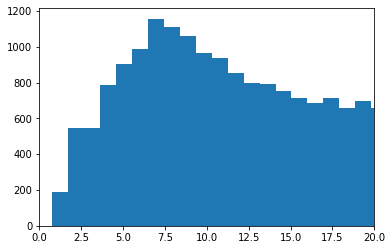

In [194]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0, 20))
hist, bins, bars = ax.hist(unfiltered_lepton_plot_arrays[0], 1000)

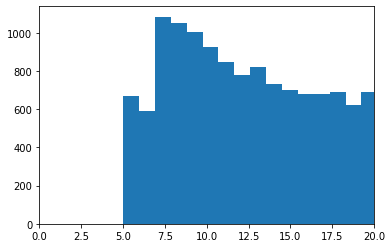

In [195]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0, 20))
hist, bins, p = plt.hist(filtered_lepton_plot_arrays[0], 1000)

This is code that I have not yet incorporated and that is left over from a previous version of the script
---

In [ ]:
def combined_charge_criteria(charges, num_of_leptons_considered):
    """function checks if a neutral charge combination can be built from a (sub)set of leptons with length
    num_of_leptons_considered (! the sequence of leptons in the event does not matter !)"""
    charges = sorted(charges)
    charge_count = len(charges)
    window_size = num_of_leptons_considered if charge_count > num_of_leptons_considered else charge_count
    combinations_considered = charge_count - window_size + 1
    for i in range(combinations_considered):
        if sum(charges[i:i+window_size]) == 0:
            return True
    return False


# this is effectively a wrapper function as discussed above
def combined_charge(event, num_of_leptons):
    charges = [lepton['charge'] for lepton in event[1]['leptons']]
    return combined_charge_criteria(charges, num_of_leptons)
    

In [ ]:
def strict_pt_in_event(pt):
    """applies strict pt requirements to the leptons"""
    pt = sorted(pt)
    if pt[-1] < 20:
        return False
    if pt[-2] < 10:
        return False
    for momentum in pt[:-2]:
        if momentum < 4:
            return False
    return True


def lepton_type(lepton, lepton_type):
    """filter function for lepton type
    
    this function is to be used as argument to the filter method
    
    Parameters
    ----------
    lepton : dict
        the dict with all the properties of the lepton, at least however
        a 'type' entry that can take on one of the values in lepton_type
    lepton_type : list or object
        the types of leptons that the filter accepts the filter accepts a
        lepton if the 'type' field of the lepton matches one of the objects
        in the lepton_type list or the lepton_type object if lepton_type is
        not a list
    """
    
    if isinstance(lepton_type, (list, np.ndarray)):
        return True if lepton['type'] in lepton_type else False
    else:
        return True if lepton['type'] == lepton_type else False

    
def strict_pt_of_lepton_type(event, ltype):
    leptons = event[1]['leptons']
    leptons_of_specified_type = filter(lambda l: lepton_type(l, ltype), leptons)
    return strict_pt_in_event([lepton['pt'] for lepton in leptons_of_specified_type])    

In the last two code blocks a few rather complicated things happened in the code. As everything strange that happens `combined_charge_criteria` and `combined_charge` also happens in `strict_pt_in_event`, `lepton_type` and `strict_pt_of_lepton_type` I'll only go through the last three functions and leave it to you as excercise to figure out how the first two work.



In [ ]:
def mandelstam_s(fourvectors):
    vec = np.add.reduce(fourvectors)
    minkovski_metric = np.diag(1, -1, -1, -1)
    return vec @ (minkovski_metric @ vec)